In [1]:
path = '/home/piai/Downloads/big_data/'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

plt.rc('font', family = 'NanumGothic')

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [3]:
dataset = pd.read_csv(path + '체질검사.csv')

In [4]:
Y = dataset['FAT']
X = dataset.drop('FAT', axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(X,Y,test_size = 0.3, random_state=1234)

In [7]:
tree_uncustomized = RandomForestRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set:{:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on training set:{:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set:0.956
Score on training set:0.612


In [8]:
train_score, test_score = [], []

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

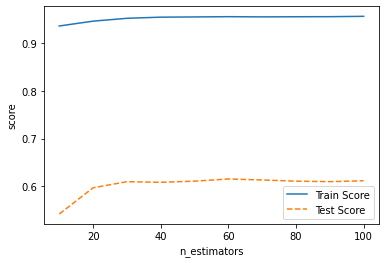

In [9]:
df_score_n.round(3)
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('n_estimators')
plt.legend()

In [10]:
#모델 파라미터 조정
train_score, test_score = [], []

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 100,
                              min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSampleLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

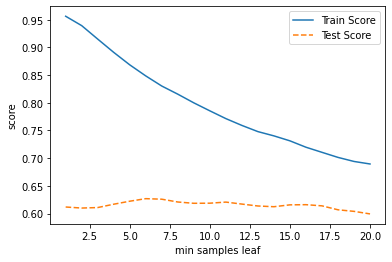

In [11]:
df_score_n.round(3)
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('min samples leaf')
plt.legend()

In [18]:
#모델 파라미터 조정 - min_samples_split
train_score, test_score = [], []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 100,
                              min_samples_leaf = 6, min_samples_split = 14 ,max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesSplit'] = para_split
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

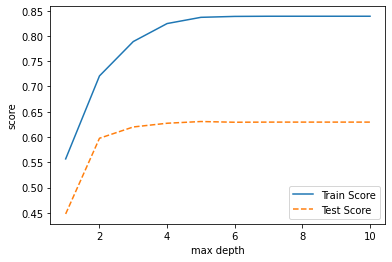

In [19]:
df_score_n.round(3)
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('max depth')
plt.legend()

In [23]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators=100, min_samples_leaf=6, min_samples_split=14, max_depth=4)

rf_final.fit(df_train_x, df_train_y)
print('Score on training set:{:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
print('Score on test set:{:.3f}'.format(rf_final.score(df_test_x, df_test_y)))

Score on training set:0.825
Score on test set:0.627


In [ ]:
v_feature_name = df_train_x.columns

# tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8)
# tree_graph.fit(df_train_x, df_train_y)
export_graphviz(rf_final.estimators_[0], out_file = 'rf_final_0.dot',
                feature_names = v_feature_name, impurity = True, filled = True)
with open('rf_final_0.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [26]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace =True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.843
4,CHEST,0.036
2,HEIGHT,0.032
0,AGE,0.014
6,HIP,0.014
7,THIGH,0.011
12,WRIST,0.010
3,NECK,0.010
8,KNEE,0.009
1,WEIGHT,0.008


Text(0, 0.5, '변수')

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/snap/jupyter/common/lib/python3.7/

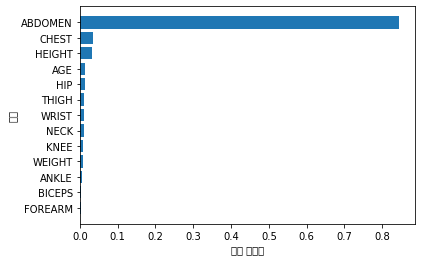

In [27]:
df_importance.sort_values('Importance', ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [29]:
estimator = RandomForestRegressor(random_state=1234)
param_grid = {'max_depth':para_depth, 'min_samples_split':para_split,'min_samples_leaf':para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = 'r2', n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/piai/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 784, i

KeyboardInterrupt: 

In [30]:
print('best estimator model: \n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_dt.best_params_))
print('\nbest score: \n{}'.format(grid_dt.best_score.round(3)_))

SyntaxError: invalid syntax (<ipython-input-30-cad216e62e2a>, line 3)

In [31]:
# 215페이지 실습

In [32]:
diabetes = pd.read_csv(path+'DIABETES.csv')

# 그래디언트 부스트 실습

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
df_body = pd.read_csv(path + '체질검사.csv')

In [36]:
Y = dataset['FAT']
X = dataset.drop('FAT', axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(X,Y,test_size = 0.3, random_state=1234)

In [37]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set:{:.3f}'.format(gb_uncustomized.score(df_train_x, df_train_y)))
print('Score on training set:{:.3f}'.format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set:0.981
Score on training set:0.581


In [38]:
#모델 파라미터 조정
train_score, test_score = [], []

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['Estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

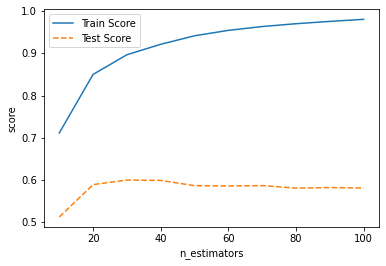

In [39]:
df_score_n.round(3)
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('n_estimators')
plt.legend()

In [40]:
#모델 파라미터 조정
train_score, test_score = [], []

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 30,
                                  min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

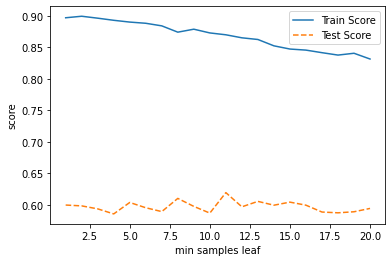

In [41]:
df_score_n.round(3)
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('min samples leaf')
plt.legend()

In [42]:
#모델 파라미터 조정
train_score, test_score = [], []

para_split = [n_split * 2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 30,
                                  min_samples_leaf = 11,
                                  min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

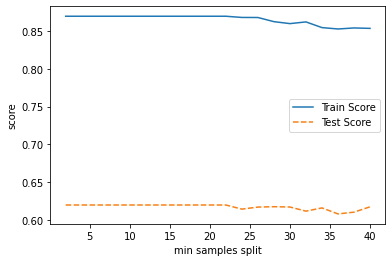

In [43]:
df_score_n.round(3)
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('min samples split')
plt.legend()

In [44]:
#모델 파라미터 조정
train_score, test_score = [], []

para_depth = [depth  for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 30,
                                  min_samples_leaf = 11,
                                  min_samples_split = 22,
                                  max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

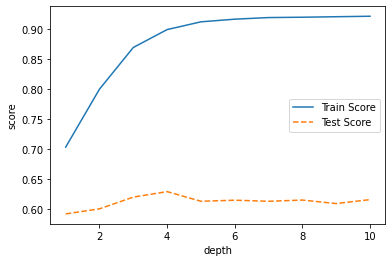

In [45]:
df_score_n.round(3)
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('depth')
plt.legend()

In [47]:
#모델 파라미터 조정
train_score, test_score = [], []

para_lr = [lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 30,
                                  min_samples_leaf = 11,
                                  min_samples_split = 22,
                                  max_depth = 4,
                                  learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr['LearningRate'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score

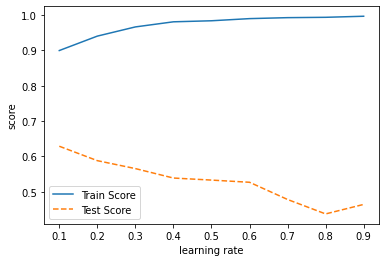

In [48]:
df_score_n.round(3)
plt.plot(para_lr, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_lr, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('learning rate')
plt.legend()

In [49]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=11, min_samples_split=22, max_depth=4, learning_rate = 0.1)

gb_final.fit(df_train_x, df_train_y)
print('Score on training set:{:.3f}'.format(gb_final.score(df_train_x, df_train_y)))
print('Score on test set:{:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

Score on training set:0.900
Score on test set:0.629


In [51]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace =True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.775
2,HEIGHT,0.038
12,WRIST,0.025
3,NECK,0.023
6,HIP,0.021
4,CHEST,0.021
0,AGE,0.021
7,THIGH,0.020
8,KNEE,0.017
10,BICEPS,0.014


Text(0, 0.5, 'Variables')

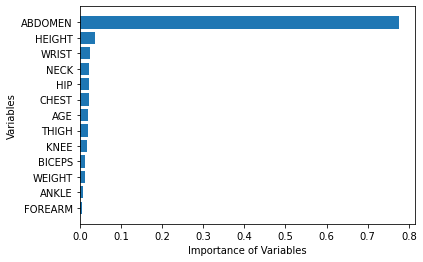

In [53]:
df_importance.sort_values('Importance', ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('Importance of Variables')
plt.ylabel('Variables')

# 실습

In [54]:
df_diabetes = pd.read_csv(path + 'DIABETES.csv')

In [55]:
df_diabetes

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87
1,75,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69
2,141,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85
3,206,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89
4,135,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80
...,...,...,...,...,...,...,...,...,...,...,...
437,178,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93
438,104,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102
439,132,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95
440,220,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85


실습 생략...

11/18 11:30 R^2이 음수값이 나오는 경우 어떻게 처리할지에 대한 설명

In [9]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statsmodels.formula.api as smf
from sklearn.ensemble import GradientBoostingRegressor

In [88]:
df_raw = pd.read_csv(path + '체질검사.csv')

In [89]:
df_raw

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9
248,23.6,43,170.75,67.50,37.4,103.7,89.7,94.2,58.5,39.0,24.1,33.8,28.8,18.8
249,20.9,35,162.75,66.00,36.4,99.1,92.8,99.2,63.1,38.7,21.7,31.1,26.4,16.9
250,17.0,56,167.75,68.50,37.4,98.6,93.0,97.0,55.4,38.8,23.2,32.4,29.7,19.0


In [12]:
# 251페이지
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [65]:
lr_model = smf.ols(formula = 'FAT~NECK+ABDOMEN+HIP+FOREARM+WRIST', data=df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

dt_model=DecisionTreeRegressor(random_state = 1234, min_samples_leaf=8, min_samples_split=20,max_depth=4)
dt_model.fit(df_train_x,df_train_y)

rf_model = RandomForestRegressor(random_state=1234,n_estimators=100, min_samples_leaf=6, min_samples_split=14, max_depth=4)
rf_model.fit(df_train_x, df_train_y)

gb_model = GradientBoostingRegressor(random_state = 1234, n_estimators=30, min_samples_leaf=11,min_samples_split = 22, max_depth = 4, learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           4.38e-68
Time:                        13:43:18   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=1234)

In [72]:
models = ['regression','DT','RF','GB']
mse, rmse, mae, mape = [],[],[],[]

lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

dt_y_pred= dt_model.predict(df_test_x)
# 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

rf_y_pred = rf_model.predict(df_test_x)
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

# 예측
gb_y_pred = gb_model.predict(df_test_x)
# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

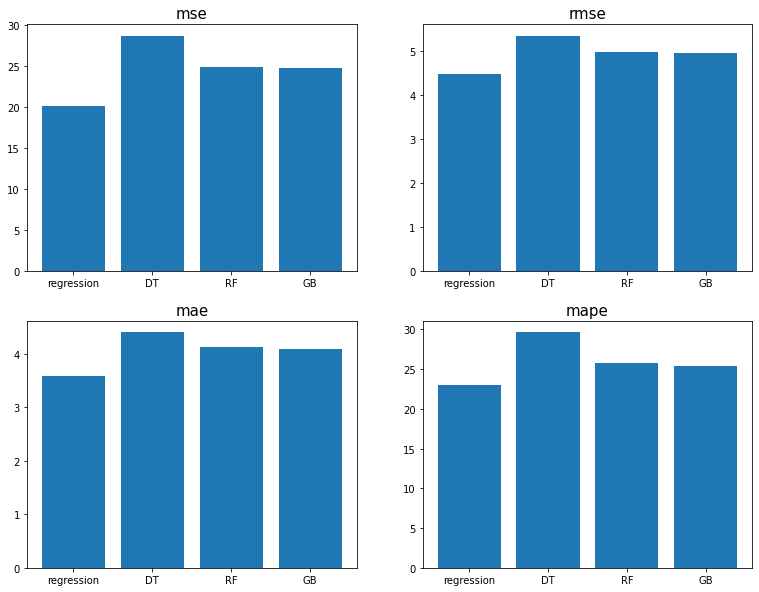

In [83]:
fig, ax = plt.subplots(2,2, figsize=(13,10))
ax[0,0].bar(models, mse)
ax[0,0].set_title('mse').set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title('rmse').set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title('mae').set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title('mape').set_fontsize(15)

In [ ]:
# 선형회귀모델의 정확도가 가장 높다.(에러가 가장 낮다)
# 의사결정나무모델의 정확도가 가장 낮다.(에러가 가장 높다.)

# 258페이지 실습

In [93]:
path

'/home/piai/Downloads/big_data/'

In [3]:
df_diabetes = pd.read_csv(path + 'DIABETES.csv')

In [4]:
Y = df_diabetes['Y']
X = df_diabetes.drop('Y',axis=1)

In [5]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(X,Y,test_size = 0.3, random_state=1234)

In [10]:
lr_model = smf.ols(formula = 'Y~GENDER+BMI+BP+HDL+LTG', data=df_diabetes)
lr_result = lr_model.fit()
print(lr_result.summary())

dt_model=DecisionTreeRegressor(random_state = 1234, min_samples_leaf=8, min_samples_split=20,max_depth=4)
dt_model.fit(df_train_x,df_train_y)

rf_model = RandomForestRegressor(random_state=1234,n_estimators=100, min_samples_leaf=6, min_samples_split=14, max_depth=4)
rf_model.fit(df_train_x, df_train_y)

gb_model = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=11, min_samples_split=22, max_depth=4, learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     90.26
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           4.75e-65
Time:                        14:13:32   Log-Likelihood:                -2390.1
No. Observations:                 442   AIC:                             4792.
Df Residuals:                     436   BIC:                             4817.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -217.6849     35.764     -6.087      0.0

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=1234)

In [16]:
models = ['regression','DT','RF','GB']
mse, rmse, mae, mape = [],[],[],[]

lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

dt_y_pred= dt_model.predict(df_test_x)
# 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

rf_y_pred = rf_model.predict(df_test_x)
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

# 예측
gb_y_pred = gb_model.predict(df_test_x)
# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

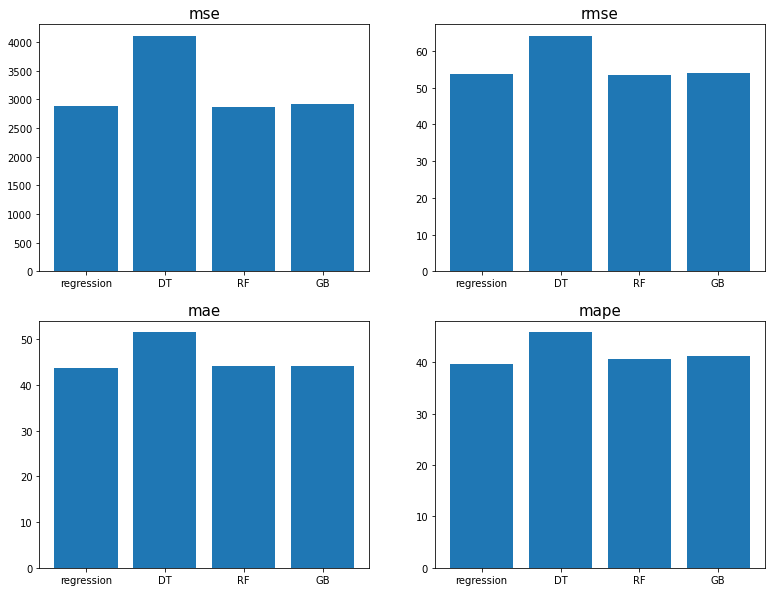

In [17]:
fig, ax = plt.subplots(2,2, figsize=(13,10))
ax[0,0].bar(models, mse)
ax[0,0].set_title('mse').set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title('rmse').set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title('mae').set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title('mape').set_fontsize(15)

# 275페이지 주성분분석 연습

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

In [22]:
df_raw = pd.read_csv(path + '직무능력평가.csv')
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [24]:
df_raw_x = df_raw.drop('EVAL', axis=1)
df_raw_y = df_raw['EVAL']
df_raw_y.head()

0    43
1    63
2    71
3    61
4    81
Name: EVAL, dtype: int64

In [25]:
df_raw_x.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,51,30,39,61,92,45
1,64,51,54,63,73,47
2,70,68,69,76,86,48
3,63,45,47,54,84,35
4,78,56,66,71,83,47


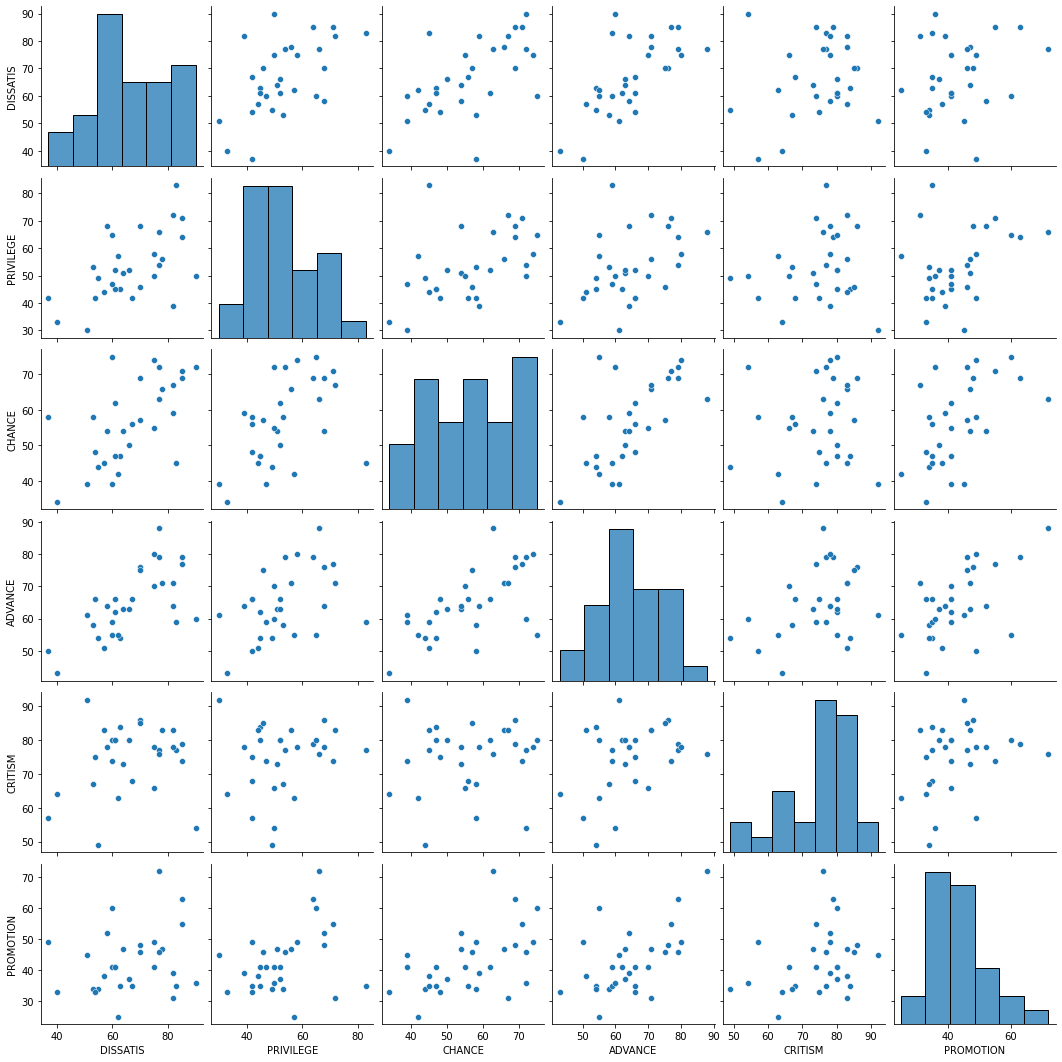

In [26]:
sns.pairplot(df_raw_x)

In [27]:
df_raw_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


In [28]:
df_raw_x.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,66.600,53.133,56.367,64.633,74.767,42.933
std,13.315,12.235,11.737,10.397,9.895,10.289
min,37.000,30.000,34.000,43.000,49.000,25.000
25%,58.500,45.000,47.000,58.250,69.250,35.000
50%,65.000,51.500,56.500,63.500,77.500,41.000
75%,77.000,62.500,66.750,71.000,80.000,47.750
max,90.000,83.000,75.000,88.000,92.000,72.000


In [30]:
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
print('Scaled Data:\n {}'.format(nd_scaled[:5].round(3)))
print('Shape:\w {}'.format(nd_scaled.shape))

Scaled Data:
 [[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape:\w (30, 6)


In [31]:
df_scaled = pd.DataFrame(nd_scaled, columns = x_cols)
df_scaled.head().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.192,-1.923,-1.505,-0.355,1.771,0.204
1,-0.199,-0.177,-0.205,-0.160,-0.182,0.402
2,0.260,1.236,1.095,1.112,1.155,0.501
3,-0.275,-0.676,-0.812,-1.040,0.949,-0.784
4,0.871,0.238,0.835,0.623,0.846,0.402


In [32]:
df_scaled.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.000,0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017
min,-2.261,-1.923,-1.938,-2.116,-2.649,-1.773
25%,-0.619,-0.676,-0.812,-0.624,-0.567,-0.784
50%,-0.122,-0.136,0.012,-0.111,0.281,-0.191
75%,0.794,0.779,0.900,0.623,0.538,0.476
max,1.787,2.483,1.615,2.286,1.771,2.873


In [33]:
#스텝4 - 주성분 분석

In [35]:
pca = PCA(n_components = 6)
nd_pca = pca.fit_transform(df_scaled)

print('PCA Data: \n{}'.format(nd_pca[:5]))
print('Shape:\n{}'.format(nd_pca.shape))

PCA Data: 
[[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
Shape:
(30, 6)


In [38]:
#주성분 분석 및 결과: 주성분 점수
df_pca = pd.DataFrame(nd_pca, columns=['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6'])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


In [39]:
#주성분 분석 및 결과: 주성분 번호, 고유값, 고유값 비율
df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [i for i in range(1,7)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


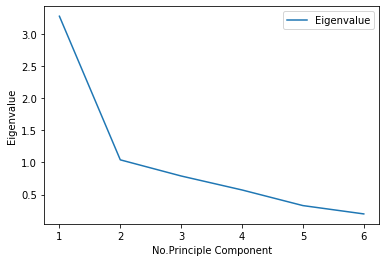

In [41]:
#주성분 분석 및 결과: Scree plot 확인 및 주성분 개수 결정
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'],
        label = 'Eigenvalue')

plt.ylabel('Eigenvalue')
plt.xlabel('No.Principle Component')
plt.legend(loc = 'best')

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/snap/jupyter/common/lib/python3.7/

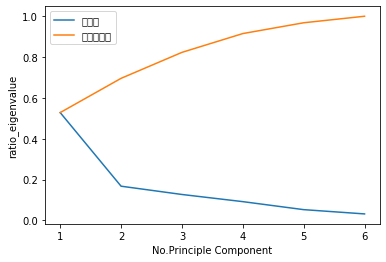

In [43]:
plt.plot(df_pca_stat['PrinNo'],
        df_pca_stat['EigenValueRatio'], label='고유값')

plt.plot(df_pca_stat['PrinNo'],
        df_pca_stat['CumEigenValueRatio'], label = '누적고유값')
plt.ylabel('ratio_eigenvalue')
plt.xlabel('No.Principle Component')
plt.legend(loc = 'best')

In [45]:
x_cols = pd.DataFrame({'Feature':df_raw_x.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1,
                                                columns = ['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6'])], axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


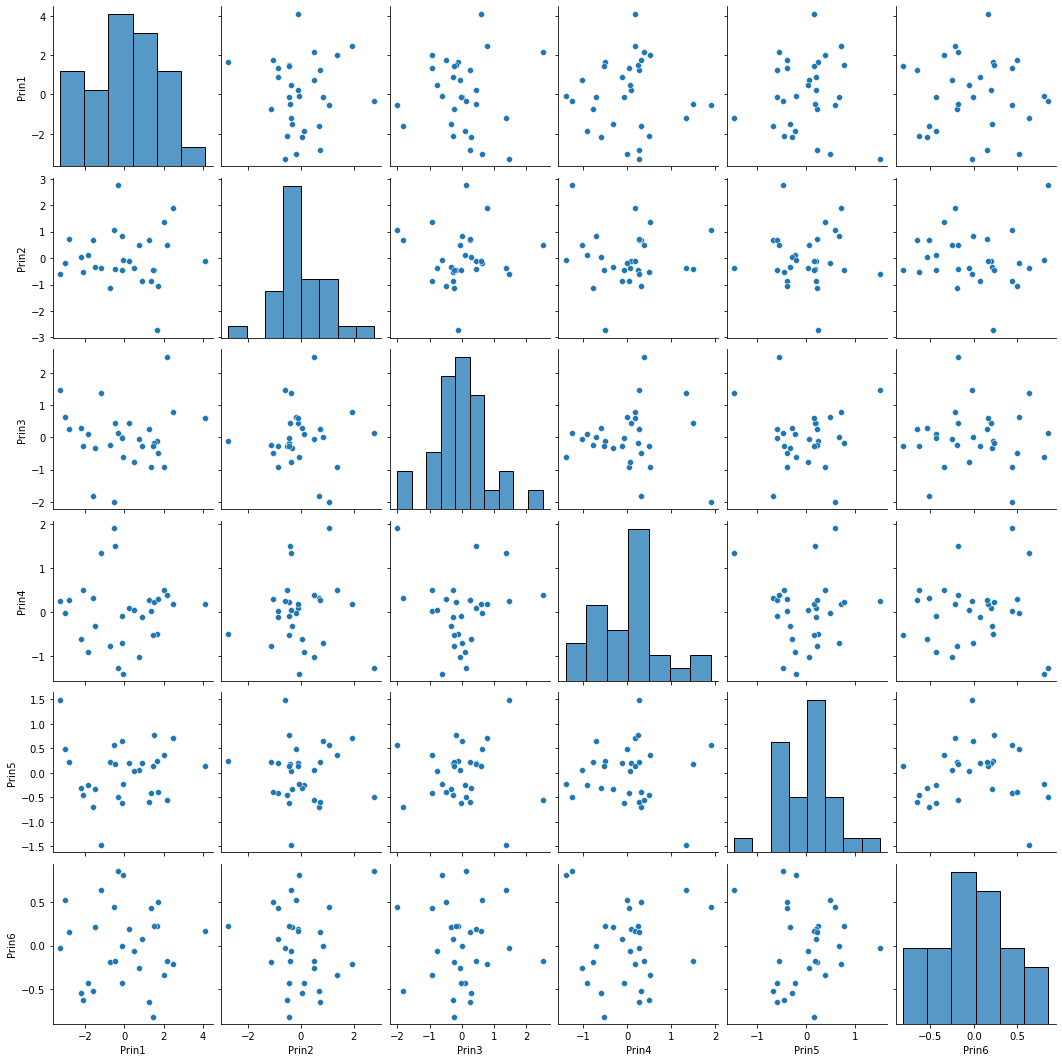

In [46]:
sns.pairplot(df_pca)

In [47]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,0.0,0.0,-0.0
Prin2,0.0,1.0,-0.0,0.0,0.0,0.0
Prin3,-0.0,-0.0,1.0,0.0,-0.0,-0.0
Prin4,0.0,0.0,0.0,1.0,0.0,-0.0
Prin5,0.0,0.0,-0.0,0.0,1.0,0.0
Prin6,-0.0,0.0,-0.0,-0.0,0.0,1.0


In [49]:
df_raw_x_const = sm.add_constant(df_raw_x)
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
reg_model = reg_model.fit()

print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.24e-05
Time:                        16:47:13   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

In [51]:
df_scaled_const = sm.add_constant(df_scaled)
reg_model = sm.OLS(df_raw_y, df_scaled_const)
reg_model=reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.24e-05
Time:                        16:47:57   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.290     50.087      0.0

In [53]:
x_var = ['Prin1','Prin2','Prin3']

df_pca_const = sm.add_constant(df_pca[x_var])

reg_model = sm.OLS(df_raw_y, df_pca_const)

reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.02e-05
Time:                        16:48:51   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0

# 시계열 분석 - 299

In [54]:
df_exchange = pd.read_csv(path+'환율.csv')

In [56]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

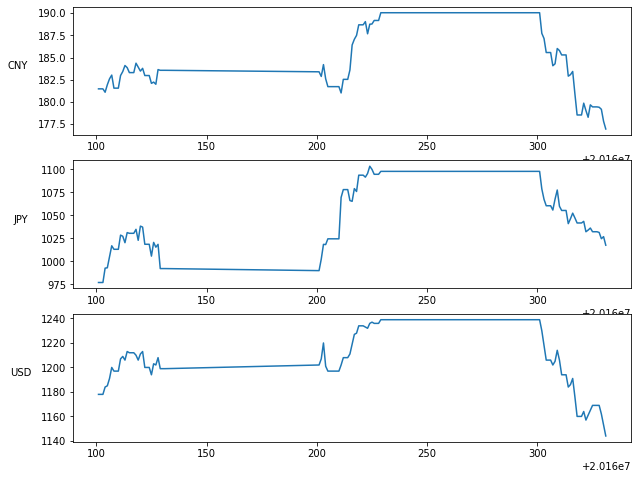

In [61]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1, figsize=(10,8))

for (ax, idx, currency) in zip([ax1, ax2, ax3], [311, 312, 313], ['CNY','JPY','USD']):
    ax.plot('APPL_DATE','STD_RATE',data=df_exchange[df_exchange['CURRENCY']==currency])
    ax.set_ylabel(currency, rotation = 0, labelpad = 20)

In [64]:
df_CNY = df_exchange[df_exchange['CURRENCY'] == 'CNY'].set_index('APPL_DATE')
df_CNY.drop(['CURRENCY','USD_CONV_DATE'],axis=1, inplace=True)

df_JPY = df_exchange[df_exchange['CURRENCY'] == 'JPY'].set_index('APPL_DATE')
df_JPY.drop(['CURRENCY','USD_CONV_DATE'], axis=1, inplace = True)

df_USD = df_exchange[df_exchange['CURRENCY'] == 'USD'].set_index("APPL_DATE")
df_USD.drop(['CURRENCY','USD_CONV_DATE'],axis=1, inplace=True)
df_CNY.head()

,STD_RATE
APPL_DATE,
20160101,181.48
20160102,181.48
20160103,181.48
20160104,181.10
20160105,181.94


In [66]:
train_size = 0.9
len_idx = len(df_CNY.index)
mask = (np.arange(len_idx) / len_idx) < train_size
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [67]:
df_CNY_train = df_CNY[mask]
df_CNY_test = df_CNY[~mask]
print('shape of train data:{}'.format(df_CNY_train.shape))
print('shape of test data:{}'.format(df_CNY_test.shape))

shape of train data:(82, 1)
shape of test data:(9, 1)


<AxesSubplot:xlabel='APPL_DATE'>

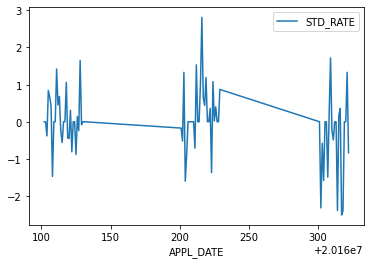

In [69]:
df_CNY_diff1 = df_CNY_train - df_CNY_train.shift(1)
df_CNY_diff1.plot()

<AxesSubplot:xlabel='APPL_DATE'>

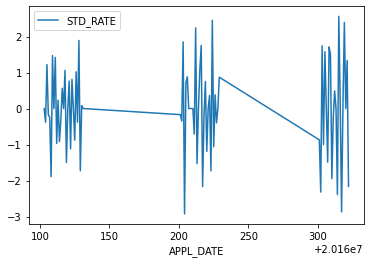

In [71]:
#2차 차분
df_CNY_diff2 = df_CNY_train - 2*(df_CNY_train.shift(1)) +\
(df_CNY_train.shift(2))
df_CNY_diff2.plot()

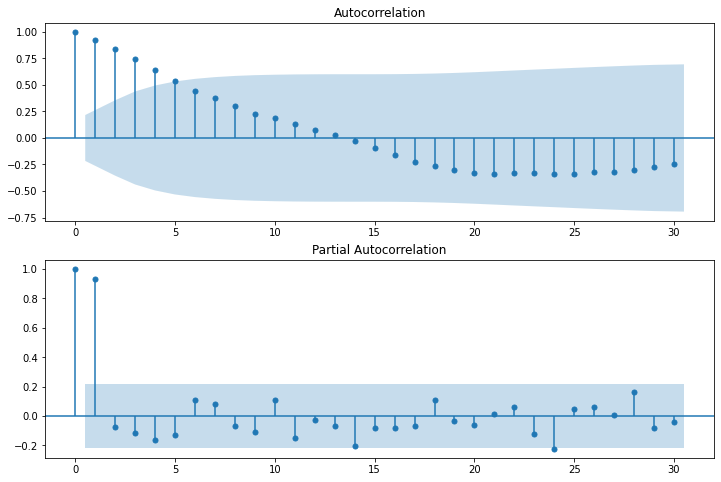

In [73]:
lag_size = 30
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_CNY_train['STD_RATE'], lags = lag_size, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df_CNY_train['STD_RATE'],lags = lag_size, ax=ax2)

In [74]:
ts_model_cny = ARIMA(df_CNY_train, order=(1,2,0))
ts_result_cny = ts_model_cny.fit(trend='c', full_output = True)
print(ts_result_cny.summary())

                             ARIMA Model Results                              
Dep. Variable:            D2.STD_RATE   No. Observations:                   80
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -123.512
Method:                       css-mle   S.D. of innovations              1.132
Date:                Wed, 18 Nov 2020   AIC                            253.025
Time:                        17:35:57   BIC                            260.171
Sample:                             2   HQIC                           255.890
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0022      0.088     -0.024      0.981      -0.175       0.171
ar.L1.D2.STD_RATE    -0.4389      0.102     -4.322      0.000      -0.638      -0.240
                        

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/piai/snap/jupyter/common/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided 

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/piai/snap/jupyter/common/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/piai/snap/jupyter/common/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ValueError: Length of passed values is 20160250, index implies 9.

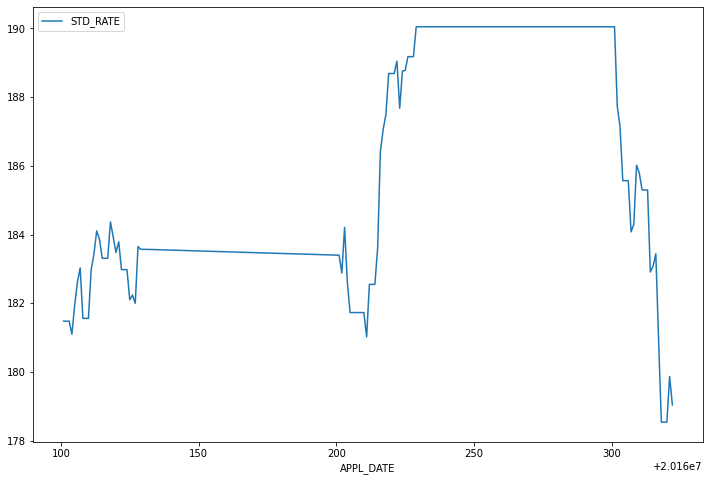

In [75]:
start_time = df_CNY_test.index.min()
end_time = df_CNY_test.index.max()
fig, ax = plt.subplots(figsize=(12,8))

ax = df_CNY_train.plot(ax=ax)
fig=ts_result_cny.plot_predict(start=start_time, end=end_time, ax=ax, plot_insample=False)

In [ ]:
start_time = pd.to_datatime('2016-01-03')
y_pred = ts_result_cny.predict(start=start_time, end=end_time, typ='levels')
df_merge = df_CNY
df_merge['예측값'] = y_pred
df_merge.head()

In [ ]:
df_merge.plot(y=['STD_RATE','예측값'],figsize=(15,7)